<a href="https://colab.research.google.com/github/BelalEbrahim/Lab04-XOR-Neural-Network-TensorFlow/blob/main/Lab04_XOR_Neural_Network_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch    0 | Loss: 0.7349 | Accuracy: 0.5000
Epoch 1000 | Loss: 0.3468 | Accuracy: 0.5000
Epoch 2000 | Loss: 0.3466 | Accuracy: 0.5000
Epoch 3000 | Loss: 0.3466 | Accuracy: 0.5000
Epoch 4000 | Loss: 0.3466 | Accuracy: 0.5000
Epoch 5000 | Loss: 0.3466 | Accuracy: 0.5000
Epoch 6000 | Loss: 0.3466 | Accuracy: 0.5000
Epoch 7000 | Loss: 0.3466 | Accuracy: 0.7500
Epoch 8000 | Loss: 0.3466 | Accuracy: 0.7500
Epoch 9000 | Loss: 0.3466 | Accuracy: 0.7500

Final Predictions:
[0. 0.] → 0.0000 (≈0)
[0. 1.] → 0.5000 (≈1)
[1. 0.] → 1.0000 (≈1)
[1. 1.] → 0.5000 (≈1)


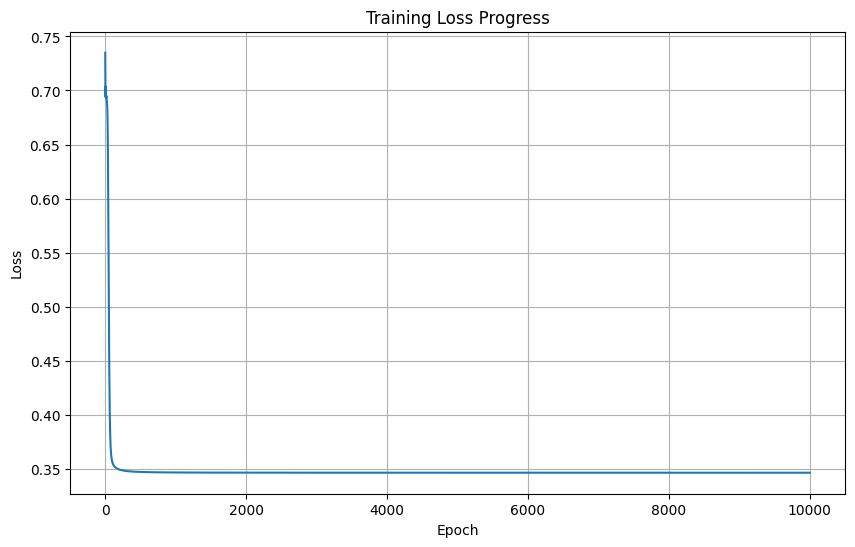


Learned Parameters:
Hidden Weights:
 [[  8.932493  -9.95804 ]
 [-20.26569  -20.865082]]
Hidden Bias:    [-5.5515327  3.7646155]
Output Weights: [ 14.55246  -14.212318]
Output Bias:    [9.47335e-05]


In [ ]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Model Implementation
class XORModel(tf.Module):
    def __init__(self):
        super().__init__()
        self.built = False
        self.loss_history = []

    def __call__(self, x, train=True):
        if not self.built:
            # Initialize weights and biases using Xavier Initialization
            initializer = tf.keras.initializers.GlorotNormal()

            self.hidden_w = tf.Variable(
                initializer(shape=(2, 2)),
                name="hidden_weights"
            )
            self.hidden_b = tf.Variable(
                tf.zeros([2]),
                name="hidden_bias"
            )
            self.output_w = tf.Variable(
                initializer(shape=(2, 1)),
                name="output_weights"
            )
            self.output_b = tf.Variable(
                tf.zeros([1]),
                name="output_bias"
            )
            self.built = True

        # Forward pass
        hidden = tf.sigmoid(tf.matmul(x, self.hidden_w) + self.hidden_b)
        output = tf.sigmoid(tf.matmul(hidden, self.output_w) + self.output_b)
        return output

# Loss Function (Binary Cross-Entropy)
def compute_loss(y_pred, y_true):
    return -tf.reduce_mean(y_true * tf.math.log(y_pred + 1e-7) + (1 - y_true) * tf.math.log(1 - y_pred + 1e-7))

# Training
def train_model(model, x_train, y_train, learning_rate=0.1, epochs=10000):
    optimizer = tf.optimizers.Adam(learning_rate)

    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            y_pred = model(x_train)
            loss = compute_loss(y_pred, y_train)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        model.loss_history.append(loss.numpy())

        if epoch % 1000 == 0:
            acc = compute_accuracy(model, x_train, y_train)
            print(f"Epoch {epoch:4d} | Loss: {loss.numpy():.4f} | Accuracy: {acc:.4f}")

# Compute Accuracy
def compute_accuracy(model, x, y_true):
    y_pred = model(x, train=False)
    y_pred_rounded = tf.round(y_pred)
    correct = tf.equal(tf.squeeze(y_pred_rounded), tf.squeeze(y_true))  # إصلاح الشكل
    return tf.reduce_mean(tf.cast(correct, tf.float32)).numpy()

# Visualization
def plot_loss(loss_history):
    plt.figure(figsize=(10, 6))
    plt.plot(loss_history)
    plt.title("Training Loss Progress")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

# XOR dataset
xor_table = np.array([
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
], dtype=np.float32)

x_train = xor_table[:, :2]
y_train = xor_table[:, 2:]

# Initialize and train model
model = XORModel()
train_model(model, x_train, y_train)

# Display results
print("\nFinal Predictions:")
y_pred = model(x_train).numpy()
for inputs, prediction in zip(x_train, y_pred):
    print(f"{inputs} → {prediction[0]:.4f} (≈{round(prediction[0])})")

# Plot training progress
plot_loss(model.loss_history)

# Learned parameters
print("\nLearned Parameters:")
print("Hidden Weights:\n", model.hidden_w.numpy())
print("Hidden Bias:   ", model.hidden_b.numpy())
print("Output Weights:", model.output_w.numpy().flatten())
print("Output Bias:   ", model.output_b.numpy())